# Setup
For setting up the project follow the steps in [README.md](../README.md)

# Data Preparation 
I imported the necessary libraries (Pandas) and load the Iris dataset from the CSV file

In [39]:
import pandas as pd
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
# Load data from scv file
iris_data = pd.read_csv("../data/iris_dataset.csv") 

# Data Exploration

## Display basic statistics
We explored the dataset by displaying basic statistics like mean, median, and standard deviations for numerical columns

In [40]:
print("Basic Statistics:")
print(iris_data.describe())

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


## Calculate some other statistics
I use Pandas' built-in aggregation functions to aggregate and calculate basic statistics such as mean, median, and standard deviation for each class separately

In [41]:
agg_funcs = {
    'SepalLengthCm': ['mean', 'median', 'std'],
    'SepalWidthCm': ['mean', 'median', 'std'],
    'PetalLengthCm': ['mean', 'median', 'std'],
    'PetalWidthCm': ['mean', 'median', 'std']
}

class_stats = iris_data.groupby("Species").agg(agg_funcs)
print("Class-wise Statistics:")
print(class_stats)

Class-wise Statistics:
                SepalLengthCm                  SepalWidthCm                   \
                         mean median       std         mean median       std   
Species                                                                        
Iris-setosa             5.006    5.0  0.352490        3.418    3.4  0.381024   
Iris-versicolor         5.936    5.9  0.516171        2.770    2.8  0.313798   
Iris-virginica          6.588    6.5  0.635880        2.974    3.0  0.322497   

                PetalLengthCm                  PetalWidthCm                   
                         mean median       std         mean median       std  
Species                                                                       
Iris-setosa             1.464   1.50  0.173511        0.244    0.2  0.107210  
Iris-versicolor         4.260   4.35  0.469911        1.326    1.3  0.197753  
Iris-virginica          5.552   5.55  0.551895        2.026    2.0  0.274650  


# Data Visualization
 I created a histogram with a kernel density estimation (KDE) plot for the "Sepal Length" feature from the Iris dataset, and it visualizes the distribution of sepal lengths for each class of iris flowers

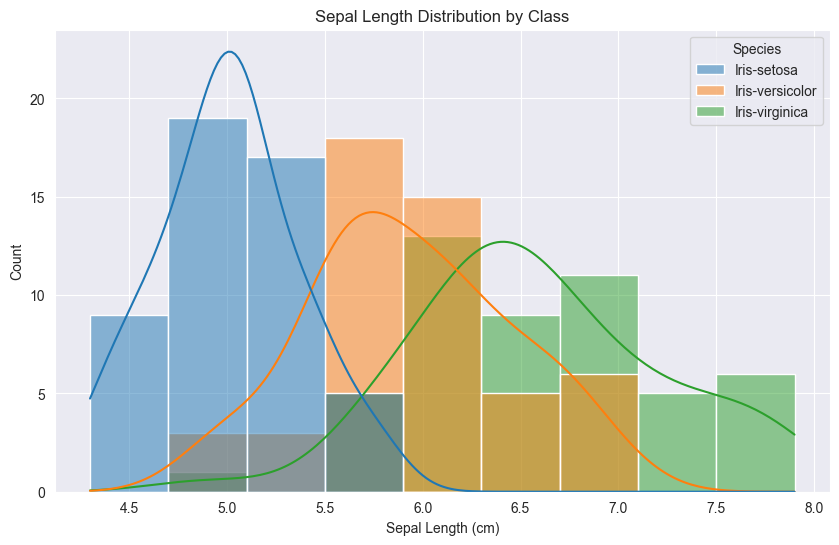

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for Sepal Length by class
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_data, x="SepalLengthCm", hue="Species", kde=True)
plt.title("Sepal Length Distribution by Class")
plt.xlabel("Sepal Length (cm)")
plt.show()


# Data Preprocessing

## Handling Missing Values
First, we need to check if there are any missing values in the dataset. If there are any missing values we can filter them. Filtering based on string length is not applicable for this dataset.

In [43]:
# Check for missing values
missing_values = iris_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Encoding Categorical Variables
In the Iris dataset, the "Species" column is categorical. To perform machine learning, we need to encode this categorical variable into numerical values. I use label encoder. 

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_data["Species_encoded"] = label_encoder.fit_transform(iris_data["Species"])

## Splitting the Data into Training and Testing Sets
To train and evaluate machine learning models, we need to split the dataset into training and testing sets. I used Scikit-learn for this purpose.
This code splits the dataset into features (X) and the target variable (y) and then further splits them into training and testing sets.

Now, you've completed the data preprocessing step.

In [45]:
from sklearn.model_selection import train_test_split

X = iris_data.drop(["Species", "Species_encoded"], axis=1)  # Features (exclude species columns)
y = iris_data["Species_encoded"]  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Building 
 For the Iris dataset, which is a classification problem, I used a simple classification algorithm such entitled K-Nearest Neighbors (K-NN) to build a basic machine learning model

## Import the necessary libraries

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Create an instance of the K-NN classifier

In [ ]:
# Create a K-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Model Training
We've already created and fitted the K-NN classifier on the training data in the previous step. We proceed with this trained model.

## Train the model using the training data

In [47]:
# Fit the K-NN classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Make Predictions on the Testing Data

In [48]:
# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate Model Performance
Now, let's evaluate the performance of our K-NN model using various metrics. These metrics will provide us with insights into how well our model is performing on the testing data.

1. **Accuracy:** Accuracy measures the proportion of correctly classified instances.

In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


2. **Classification Report:** The classification report provides precision, recall, F1-score, and support for each class.

In [50]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


3. **Confusion Matrix:** The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions.

In [51]:
from sklearn.metrics import confusion_matrix

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


4. **Other Relevant Metrics:** I also want to calculate and print mean squared error (MSE) to measure the model's performance.

In [52]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error (for regression tasks)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.00


5. **Interpret the Results:**
For interpret the results we need to follow these instructions 
- Review the accuracy score to see how well the model classifies instances correctly.
- Examine the classification report to understand precision, recall, and F1-score for each class.
- Analyze the confusion matrix to identify how many instances were correctly or incorrectly classified.